<a href="https://colab.research.google.com/github/TurboGoose/Optimization/blob/main/Optimization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time 
from math import *

In [2]:
P1 = len("Коновалов") # 9
P2 = len("Илья")      # 4
Q1 = len("Олегович")  # 8
Q2 = P2

P = complex(P1, P2)
Q = complex(Q1, Q2)

PRECISION = (1.e-11) * 5    

In [3]:
call_count = 0

def drop_call_counter():
    global call_count
    call_count = 0

In [4]:
def polynom(x, y):
    z = complex(x, y)
    return z**2 + P*z + Q

def function(x, y):
    global call_count
    call_count += 1
    return abs(polynom(x, y))**2

def df_x(x, y):
    global call_count
    call_count += 1
    return 2*((x**2 - y**2 + x*P1 - y*P2 + Q1)*(2*x + P1) + (2*x*y + y*P1 + x*P2 + Q2)*(2*y + P2))

def df_y(x, y):
    global call_count
    call_count += 1
    return 2*((2*x*y + y*P1 + x*P2 + Q2)*(2*x + P1) - (x**2 - y**2 + x*P1 - y*P2 + Q1)*(2*y + P2))

def get_complex_pair(z):
    p = np.array([1 + 0.j, P, Q])
    first = np.array([1 + 0.j, -z])
    second = np.polydiv(p, first)
    return -second[0][1]

In [5]:
def truncate(f, n):
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])


def fn(num):
    return truncate(num, 5)

# График функции |f(z)|^2

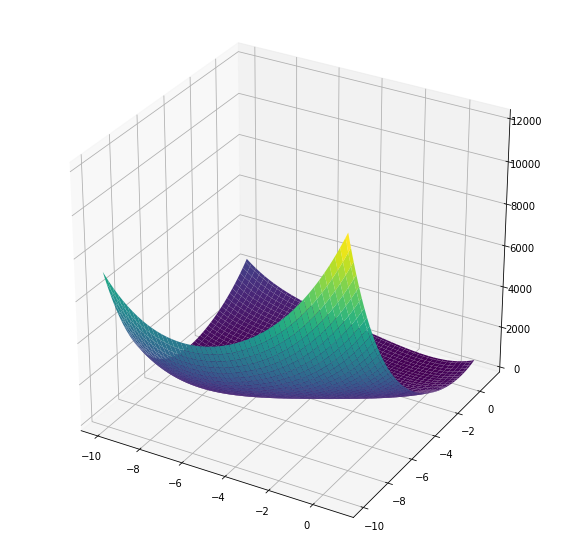

In [6]:
def function_show():
    amount = np.int(100)
    x = np.linspace(-10, 1, amount)  
    y = np.linspace(-10, 1, amount)
    x, y = np.meshgrid(x, y)
    func = np.vectorize(function)
    z = func(x, y)
    fig = plt.figure(figsize=(10,10))    
    ax = fig.add_subplot(projection='3d')    
    ax.plot_surface(x, y, z, cmap='viridis')
    plt.grid()

function_show()

# Линии уровня функции |f(z)|^2

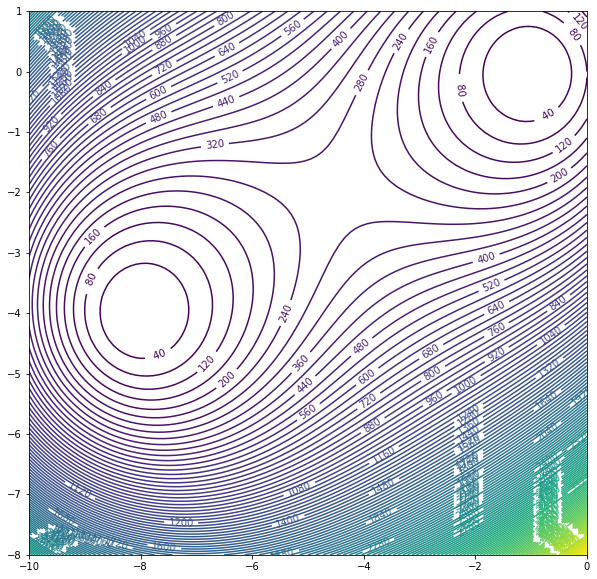

In [7]:
def no_color_contour_show():
    amount = np.int(100)
    x = np.linspace(-10, 0, amount)  
    y = np.linspace(-8, 1, amount)
    x,y = np.meshgrid(x,y)
    func = np.vectorize(function)
    z = func(x, y)
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot()
    cs = ax.contour(x, y, z, levels = 150)
    ax.clabel(cs, fmt = "%3.0f")
    plt.show()

no_color_contour_show()

In [12]:
EPS = (1.e-11) * 5  
P1 = len('Бикбулатов')
P2 = len('Даниил')
Q1 = len('Ильфатович')
Q2 = len('Даниил')
P = complex(P1, P2)
Q = complex(Q1, Q2)
CALLS = 0

def polynom(x, y):
    z = complex(x, y)
    res = z**2 + P * z + Q
    return res

def function(x, y):
    global CALLS
    CALLS += 1
    res = abs(polynom(x, y))**2
    return res

# Метод покоординатного спуска

In [13]:
def coordinate_descent(a=10, b=10):
    start_time = time()
    iterations = 0

    delta = 5 * 10 ** (-6)
    step_RE = 5
    step_IM = 5
    f_abs = function(a, b)

    print("{}) Re={}, Im={} (|f|^2 = {})\n".format(iterations, fn(a), fn(b), fn(f_abs)))
    while fabs(step_RE) > delta and fabs(step_IM) > delta:
        flag_RE = True
        flag_IM = False
        count_RE = 0
        count_IM = 0
        change_flag = False
        while flag_RE:
            iterations += 1
            new_point = a + step_RE
            f_new_point = function(new_point, b)
            print("{}) Минимизируем действительную часть (шаг={}) [{}]".format(iterations, step_RE, call_count))
            print("  Старая точка: Re={}, Im={} (|f|^2 = {})".format(fn(a), fn(b), fn(f_abs)))
            print("  Новая точка: Re={}, Im={} (|f|^2 = {})\n".format(fn(new_point), fn(b), fn(f_new_point)))

            if f_new_point < f_abs:
                a = new_point
                f_abs = f_new_point
                count_RE += 1
            elif not change_flag and count_RE == 0:
                step_RE *= -1
                change_flag = True
            else:
                step_RE /= 2
                flag_RE = False
                flag_IM = True
                print("  Уменьшаем действительный шаг\n")

        change_flag = False
        while flag_IM:
            iterations += 1
            print("{}) Минимизируем мнимую часть (шаг={}) [{}]".format(iterations, step_IM, call_count))
            new_point = b + step_IM
            f_new_point = function(a, new_point)
            print("  Старая точка: Re={}, Im={} (|f|^2 = {})".format(fn(a), fn(b), fn(f_abs)))
            print("  Новая точка: Re={}, Im={} (|f|^2 = {})\n".format(fn(a), fn(new_point), fn(f_new_point)))

            if f_new_point < f_abs:
                b = new_point
                f_abs = f_new_point
                count_IM += 1
            elif not change_flag and count_IM == 0:
                step_IM *= -1
                change_flag = True
            else:
                step_IM /= 2
                flag_IM = False
                print("  Уменьшаем мнимый шаг\n")

    elapsed_time_milliseconds = round((time() - start_time) * 1000, 3)
    print("\nКоличество итераций:", iterations)
    print("Количество вызовов функции:", call_count)
    print("Затраченное время (миллисекунды):", elapsed_time_milliseconds)

    return complex(a, b)

drop_call_counter()
res1 = coordinate_descent()
res2 = get_complex_pair(res1)
print("\nРезультат:\nRe={}, Im={}\nRe={}, Im={}".format(fn(res1.real), fn(res1.imag), fn(res2.real), fn(res2.imag)))


0) Re=10.00000, Im=10.00000 (|f|^2 = 136456.00000)

1) Минимизируем действительную часть (шаг=5) [0]
  Старая точка: Re=10.00000, Im=10.00000 (|f|^2 = 136456.00000)
  Новая точка: Re=15.00000, Im=10.00000 (|f|^2 = 296641.00000)

2) Минимизируем действительную часть (шаг=-5) [0]
  Старая точка: Re=10.00000, Im=10.00000 (|f|^2 = 136456.00000)
  Новая точка: Re=5.00000, Im=10.00000 (|f|^2 = 61321.00000)

3) Минимизируем действительную часть (шаг=-5) [0]
  Старая точка: Re=5.00000, Im=10.00000 (|f|^2 = 61321.00000)
  Новая точка: Re=0.00000, Im=10.00000 (|f|^2 = 33736.00000)

4) Минимизируем действительную часть (шаг=-5) [0]
  Старая точка: Re=0.00000, Im=10.00000 (|f|^2 = 33736.00000)
  Новая точка: Re=-5.00000, Im=10.00000 (|f|^2 = 31201.00000)

5) Минимизируем действительную часть (шаг=-5) [0]
  Старая точка: Re=-5.00000, Im=10.00000 (|f|^2 = 31201.00000)
  Новая точка: Re=-10.00000, Im=10.00000 (|f|^2 = 46216.00000)

  Уменьшаем действительный шаг

6) Минимизируем мнимую часть (шаг=5) 